# HW 2:

## Ben Ezra 316046374
## Amit Nahum 315871400

## The runtime of the program is somehow long!

### Imports:

In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
from nltk.corpus import stopwords
import string


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ezrab\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ezrab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ezrab\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Reading the Data:

In [2]:
df = pd.read_csv("spam_ham_dataset.csv")
df2 = pd.read_csv("spam_ham_dataset.csv")
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [4]:
df['length'] = df['text'].apply(len)
df.head()

,Unnamed: 0,label,text,label_num,length
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


<AxesSubplot:xlabel='label', ylabel='length'>

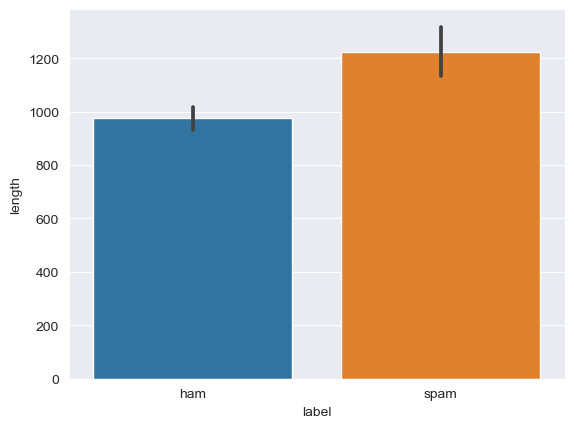

In [5]:
sns.barplot(x='label',y='length', data=df)

<AxesSubplot:ylabel='Frequency'>

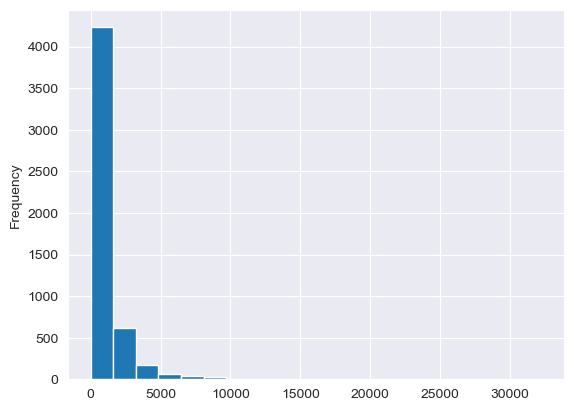

In [6]:
df['length'].plot(bins=20, kind='hist',ylabel='Frequency')

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

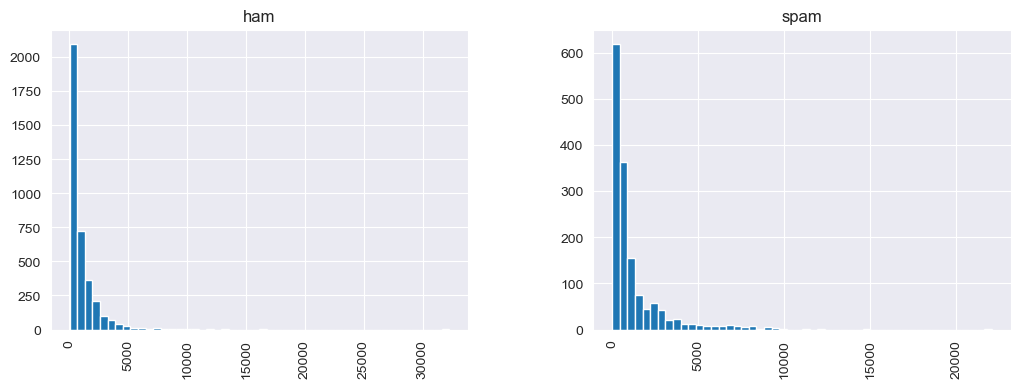

In [7]:
df.hist(column='length', by='label', bins=50,figsize=(12,4))

The length of messages in both labels looks pretty much the same.. but we'll take a deeper look inside the dataset.

In [8]:
df = df.drop('label',axis=1)

### Tokenizing:

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
stopset = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii', stop_words=stopset)

In [10]:
# Tokenizing the texts of each message.
X = vectorizer.fit_transform(df.text)
X.shape

(5171, 50303)

In [11]:
# Our Target
y = df.label_num

In [12]:
# TF-IDF Vectorizer - putting the terms in a vector for a further usage.
stopset = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True, strip_accents='ascii', stop_words=stopset)

In [13]:
#Convert df.txt from text to features - features to extract and to get information on the frequency of each one in each label.
X = vectorizer.fit_transform(df.text)

In [14]:
#Creating a train and test data for the evaluation of frequent tokens for each category and also important features.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [15]:
from sklearn import naive_bayes
#Using this algorithm for binary classification (spam/ham)
clf = naive_bayes.MultinomialNB()
model=clf.fit(X_train, y_train)
clf.feature_log_prob_ # getting the log-probability of each word (normalized).


array([[ -7.10555008,  -6.6051973 , -10.94268891, ..., -11.09387806,
        -11.09387806, -11.09387806],
       [ -8.76276862,  -9.31436663, -10.71637441, ..., -10.86728209,
        -10.97887973, -10.95091963]])

In [16]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}

#getting the most important features in the dataset.

    # loop for each class
    classes ={}
    for class_index in range(model.feature_log_prob_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.feature_log_prob_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

In [17]:
importance = get_most_important_features(vectorizer, clf, 20)

In [18]:
top_features = importance[0]['tops']

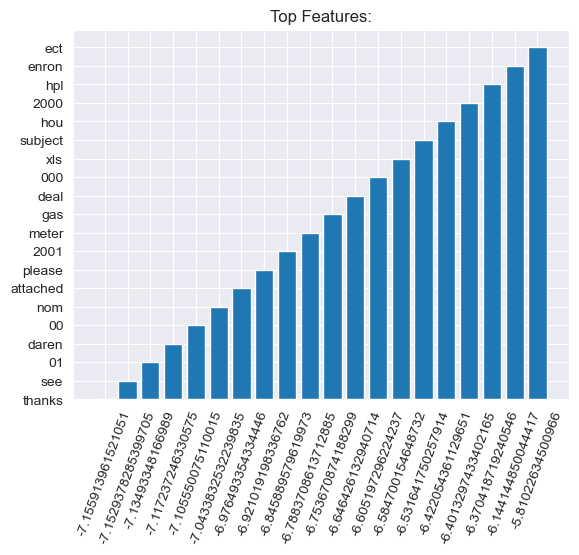

In [19]:
plt.bar(range(len(top_features)), [val[1] for val in top_features], align='center')
plt.xticks(range(len(top_features)), [val[0] for val in top_features])
plt.xticks(rotation=70)
plt.title('Top Features:')
plt.show()

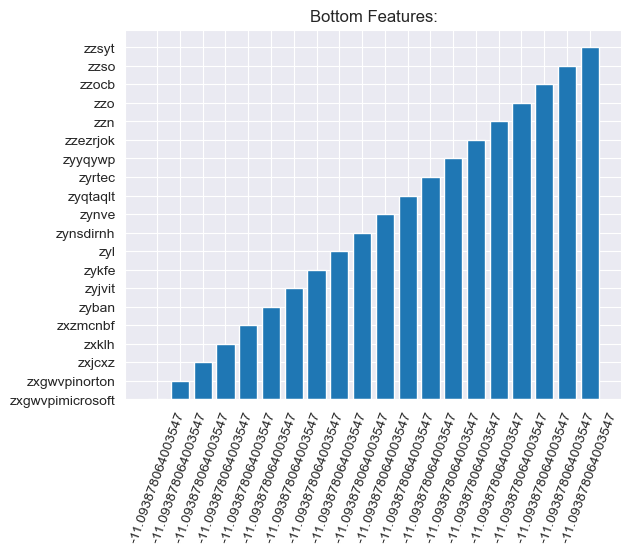

In [20]:
bottom_features = importance[0]['bottom']
plt.bar(range(len(bottom_features)), [val[1] for val in bottom_features], align='center')
plt.xticks(range(len(bottom_features)), [val[0] for val in bottom_features])
plt.xticks(rotation=70)
plt.title('Bottom Features:')
plt.show()

Q4: Features extract:

In [21]:
print ('the most important features: ', importance)

the most important features:  {0: {'tops': [(-7.155913961521051, 'thanks'), (-7.1529378285399705, 'see'), (-7.13493348166989, '01'), (-7.117237246330575, 'daren'), (-7.105550075110015, '00'), (-7.0433832532239835, 'nom'), (-6.976493354334446, 'attached'), (-6.921019198336762, 'please'), (-6.845889579619973, '2001'), (-6.7883708613712885, 'meter'), (-6.753670874188299, 'gas'), (-6.646426132940714, 'deal'), (-6.605197296224237, '000'), (-6.584700154648732, 'xls'), (-6.531641750257914, 'subject'), (-6.422054361129651, 'hou'), (-6.4013297433402165, '2000'), (-6.370418719240546, 'hpl'), (-6.144144850044417, 'enron'), (-5.81022634500966, 'ect')], 'bottom': [(-11.093878064003547, 'zxgwvpimicrosoft'), (-11.093878064003547, 'zxgwvpinorton'), (-11.093878064003547, 'zxjcxz'), (-11.093878064003547, 'zxklh'), (-11.093878064003547, 'zxzmcnbf'), (-11.093878064003547, 'zyban'), (-11.093878064003547, 'zyjvit'), (-11.093878064003547, 'zykfe'), (-11.093878064003547, 'zyl'), (-11.093878064003547, 'zynsdir

Q3: Tokens frequency in each Category:

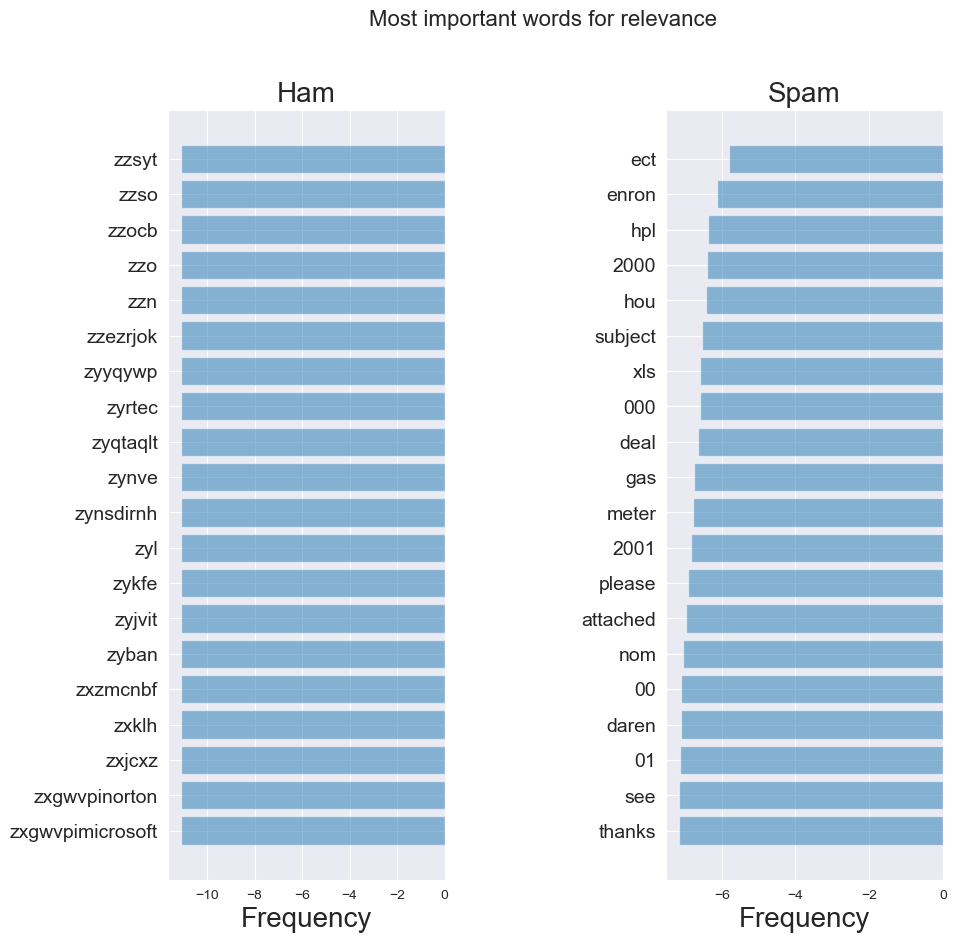

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])

    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)

    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]

    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    fig = plt.figure(figsize=(10, 10))

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Ham', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Frequency', fontsize=20)

    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Spam', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Frequency', fontsize=20)

    plt.subplots_adjust(wspace=0.8)
    plt.show()
top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

In [23]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = \
train_test_split(df2['text'], df2['label'], test_size=0.2)

In [24]:
def text_process(mess):
    #Takes in a string of text, then performs the following: Remove all punctuation, Remove all stopwords, Returns a list of the cleaned text

    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)

    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

Logistic Regression:

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
pipeline_lr = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Logistic regression
])

In [26]:
from sklearn.metrics import classification_report, accuracy_score
pipeline_lr.fit(X2_train,y2_train)
predictions_lr=pipeline_lr.predict(X2_test)
print(classification_report(predictions_lr,y2_test))
log_reg_score=accuracy_score(predictions_lr,y2_test)
print(log_reg_score)

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       725
        spam       1.00      0.97      0.99       310

    accuracy                           0.99      1035
   macro avg       0.99      0.99      0.99      1035
weighted avg       0.99      0.99      0.99      1035

0.991304347826087


K nearest neighbour classifier:

In [27]:
from sklearn.neighbors import KNeighborsClassifier

pipeline_knn = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', KNeighborsClassifier()),  # train on TF-IDF vectors w/ K-nn
])

In [28]:
pipeline_knn.fit(X2_train,y2_train)
predictions_knn=pipeline_knn.predict(X2_test)
print(classification_report(predictions_knn,y2_test))
knn_score=accuracy_score(predictions_knn,y2_test)
print(knn_score)

              precision    recall  f1-score   support

         ham       1.00      0.97      0.98       755
        spam       0.91      0.99      0.95       280

    accuracy                           0.97      1035
   macro avg       0.96      0.98      0.97      1035
weighted avg       0.97      0.97      0.97      1035

0.9719806763285024


Decision tree Classifier:

In [29]:
from sklearn.tree import DecisionTreeClassifier
pipeline_dt = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', DecisionTreeClassifier()),  # train on TF-IDF vectors w/ DecisionTreeClassifier
])

In [30]:
pipeline_dt.fit(X2_train,y2_train)
predictions_dt =pipeline_dt.predict(X2_test)
print(classification_report(predictions_dt,y2_test))
decesion_tree_score=accuracy_score(predictions_dt,y2_test)
print(decesion_tree_score)

              precision    recall  f1-score   support

         ham       0.96      0.96      0.96       733
        spam       0.91      0.91      0.91       302

    accuracy                           0.95      1035
   macro avg       0.94      0.94      0.94      1035
weighted avg       0.95      0.95      0.95      1035

0.9487922705314009


Q8: Comparing between each method of model evaluation.

In [31]:
results=[log_reg_score,knn_score,decesion_tree_score]
n=['Log-Reg.','KNN','D-tree']

In [32]:
ndf=pd.DataFrame(n)
rdf=pd.DataFrame(results)
rdf[1]=n

In [33]:
print('Accuracy of the 3 different models:')
rdf

Accuracy of the 3 different models:


,0,1
0,0.991304,Log-Reg.
1,0.971981,KNN
2,0.948792,D-tree


Q9: As we can see all the 3 methods offers good accuracy. But the most accurate one in log-regression.
We propose that the main reason for it is that this method predicts the best whether something is true or false - whether the message is spam or ham. using bag of words and tokenizer, the model can predict if the sentence is spam or ham with the frequency of a token.